<a href="https://colab.research.google.com/github/CabritaVm/AAproject/blob/main/reglinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib
!pip install pandas
!pip install numpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
## Script do projeto final de Aprendizagem automática

##ESTBarreiro - IPS
##Bioinformatica
##Junho 2023
##Ano 2, Semestre 2

##UC: Aprendizagem Automática (Machine Learning)

##Trabalho realizado por:
##Diogo Cabrita nº202000212
##Tiago Beja nº 202000197

##Professor:
##António Gonçalves

In [3]:
###PROJETO DE MACHINE LEARNING

##Este script usa o dataset "online+news+popularity.csv" como base de trabalho.

##1.Imports necessários para a exploração e análise
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score




In [4]:
##2. Carregamento do dataset

In [5]:
!curl https://raw.githubusercontent.com/CabritaVm/AAproject/main/projetoaa/OnlineNewsPopularity.csv >> OnlineNewsPopularity.csv
df = pd.read_csv('OnlineNewsPopularity.csv')

print(df.head())

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.1M  100 23.1M    0     0  39.9M      0 --:--:-- --:--:-- --:--:-- 39.8M
                                                 url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0     

In [6]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [7]:
##3.Detetar a Missing data

In [8]:
pd.set_option('display.max_rows', None)
df.isnull().sum()


url                               0
 timedelta                        0
 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                 

In [9]:
# Número e tipo de características
num_caracteristicas = df.shape[1]
tipos_caracteristicas = df.dtypes
print("Número de características:", num_caracteristicas)


# Número de amostras
num_amostras = df.shape[0]
print("Número de amostras:", num_amostras)



Número de características: 61
Número de amostras: 39644


In [10]:
##Trocar a Missing Data
##Neste caso não existe missing values

In [11]:
##Tamanho do dataset
##Caracteristica etc

In [12]:
df.shape

(39644, 61)

In [13]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [14]:
print(df.columns)

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [15]:
print(df.dtypes)

url                                object
 timedelta                        float64
 n_tokens_title                   float64
 n_tokens_content                 float64
 n_unique_tokens                  float64
 n_non_stop_words                 float64
 n_non_stop_unique_tokens         float64
 num_hrefs                        float64
 num_self_hrefs                   float64
 num_imgs                         float64
 num_videos                       float64
 average_token_length             float64
 num_keywords                     float64
 data_channel_is_lifestyle        float64
 data_channel_is_entertainment    float64
 data_channel_is_bus              float64
 data_channel_is_socmed           float64
 data_channel_is_tech             float64
 data_channel_is_world            float64
 kw_min_min                       float64
 kw_max_min                       float64
 kw_avg_min                       float64
 kw_min_max                       float64
 kw_max_max                       

In [16]:
for column in df.columns:
     df[column] = pd.to_numeric(df[column], errors='coerce')

print(df.dtypes)

url                               float64
 timedelta                        float64
 n_tokens_title                   float64
 n_tokens_content                 float64
 n_unique_tokens                  float64
 n_non_stop_words                 float64
 n_non_stop_unique_tokens         float64
 num_hrefs                        float64
 num_self_hrefs                   float64
 num_imgs                         float64
 num_videos                       float64
 average_token_length             float64
 num_keywords                     float64
 data_channel_is_lifestyle        float64
 data_channel_is_entertainment    float64
 data_channel_is_bus              float64
 data_channel_is_socmed           float64
 data_channel_is_tech             float64
 data_channel_is_world            float64
 kw_min_min                       float64
 kw_max_min                       float64
 kw_avg_min                       float64
 kw_min_max                       float64
 kw_max_max                       

In [17]:
df.isnull().sum()

url                               39644
 timedelta                            0
 n_tokens_title                       0
 n_tokens_content                     0
 n_unique_tokens                      0
 n_non_stop_words                     0
 n_non_stop_unique_tokens             0
 num_hrefs                            0
 num_self_hrefs                       0
 num_imgs                             0
 num_videos                           0
 average_token_length                 0
 num_keywords                         0
 data_channel_is_lifestyle            0
 data_channel_is_entertainment        0
 data_channel_is_bus                  0
 data_channel_is_socmed               0
 data_channel_is_tech                 0
 data_channel_is_world                0
 kw_min_min                           0
 kw_max_min                           0
 kw_avg_min                           0
 kw_min_max                           0
 kw_max_max                           0
 kw_avg_max                           0


In [18]:
##Análise de duas variáveis através de um histograma

In [19]:
##Primeiro temos de ver se tem valores NAs
# Replace NAs with column means
df_filled = df.fillna(df.mean())

# Display the DataFrame with filled values
print(df_filled.head())

   url   timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
0  NaN       731.0             12.0              219.0          0.663594   
1  NaN       731.0              9.0              255.0          0.604743   
2  NaN       731.0              9.0              211.0          0.575130   
3  NaN       731.0              9.0              531.0          0.503788   
4  NaN       731.0             13.0             1072.0          0.415646   

    n_non_stop_words   n_non_stop_unique_tokens   num_hrefs   num_self_hrefs  \
0                1.0                   0.815385         4.0              2.0   
1                1.0                   0.791946         3.0              1.0   
2                1.0                   0.663866         3.0              1.0   
3                1.0                   0.665635         9.0              0.0   
4                1.0                   0.540890        19.0             19.0   

    num_imgs  ...   min_positive_polarity   max_positive_polar

In [20]:
##Criação dos modelos de histogramas

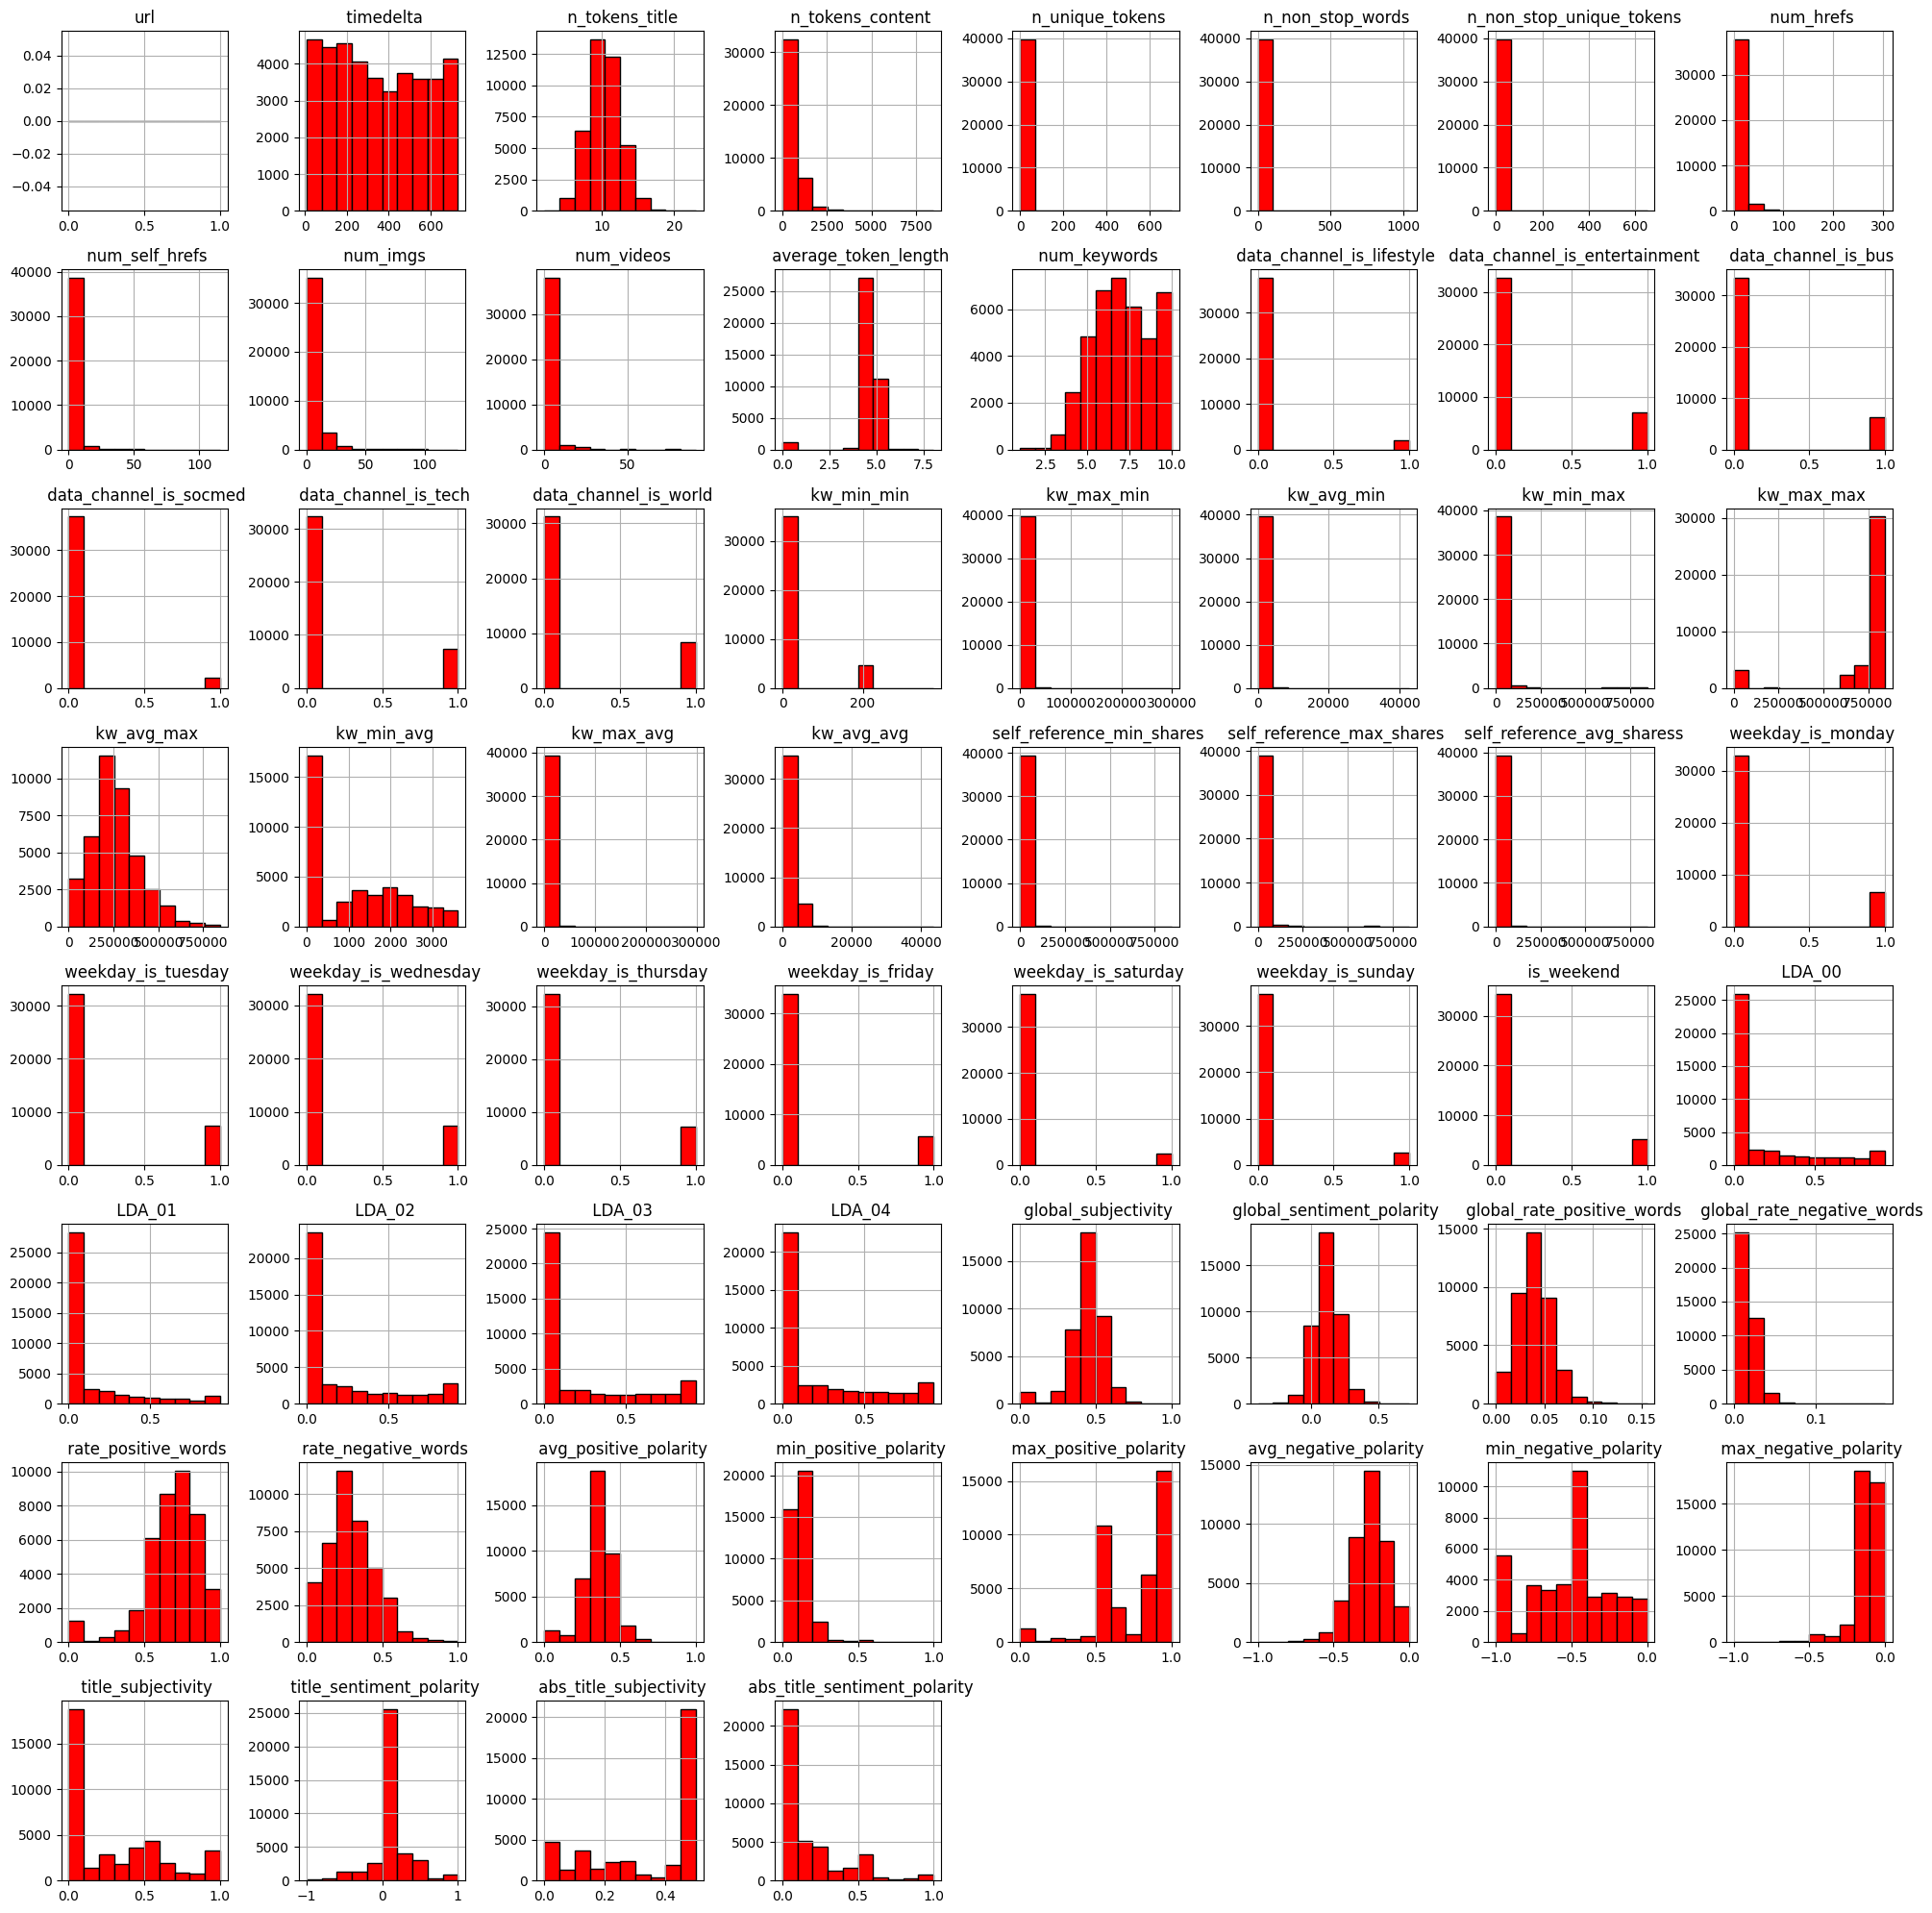

In [21]:
# Obtain a list of all numeric columns
num_cols = df.select_dtypes(include=['float64']).columns

# Create a histogram for each numeric column
df[num_cols].hist(figsize=[20, 20], bins=10, color='red', histtype='bar', edgecolor='black')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [22]:
##Melhores modelos para Histogramas

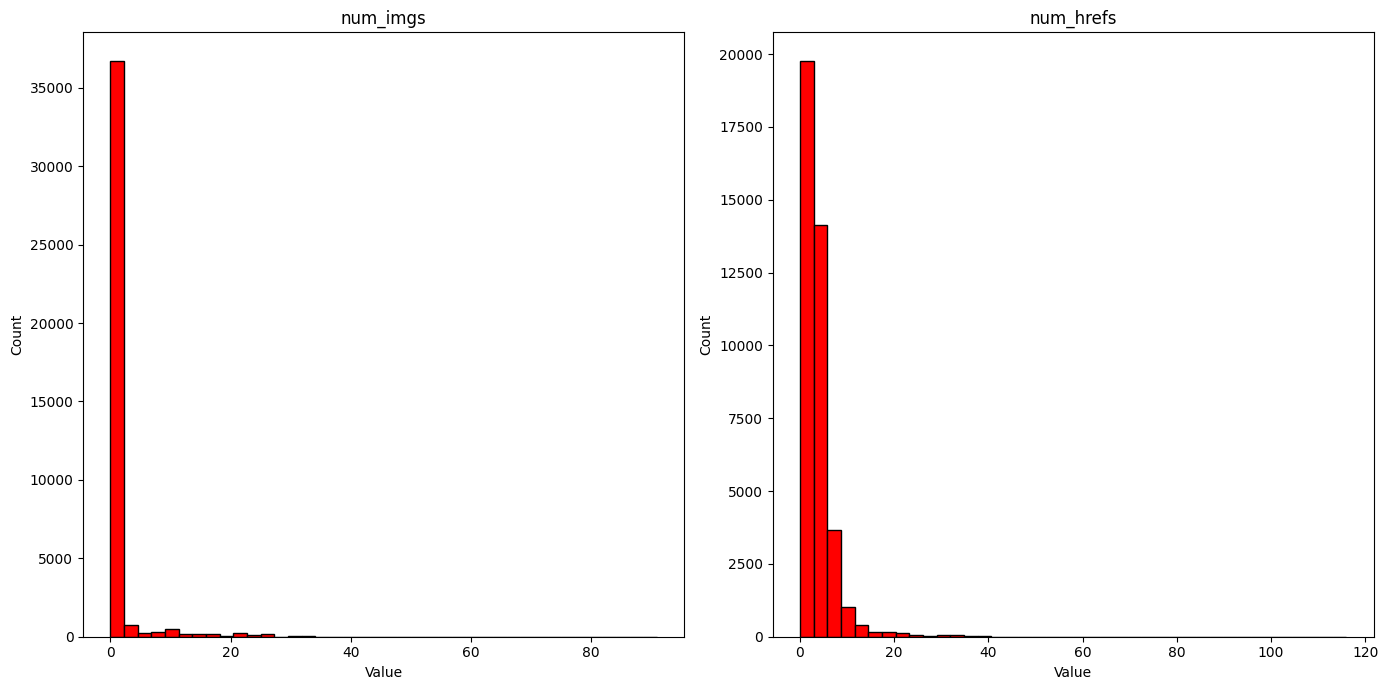

In [23]:

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Plot histogram for column1
counts1, bins1, patches1 = axs[0].hist(df.iloc[:, 10], bins=40, color='red', edgecolor='black')
axs[0].set_title('num_imgs')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Count')

# Plot histogram for column2
counts2, bins2, patches2 = axs[1].hist(df.iloc[:, 8], bins=40, color='red', edgecolor='black')
axs[1].set_title('num_hrefs')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [24]:
##Seleção das variaveis para o modelo

In [25]:

# Select the features and target variable based on the indices
X = df.iloc[:,2:60].values
y = df.iloc[:,-1].values

print(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



[[ 1.20000000e+01  2.19000000e+02  6.63594467e-01 ... -1.87500000e-01
   0.00000000e+00  1.87500000e-01]
 [ 9.00000000e+00  2.55000000e+02  6.04743081e-01 ...  0.00000000e+00
   5.00000000e-01  0.00000000e+00]
 [ 9.00000000e+00  2.11000000e+02  5.75129531e-01 ...  0.00000000e+00
   5.00000000e-01  0.00000000e+00]
 ...
 [ 1.00000000e+01  4.42000000e+02  5.16355139e-01 ...  1.36363636e-01
   4.54545455e-02  1.36363636e-01]
 [ 6.00000000e+00  6.82000000e+02  5.39493293e-01 ...  0.00000000e+00
   5.00000000e-01  0.00000000e+00]
 [ 1.00000000e+01  1.57000000e+02  7.01986750e-01 ...  2.50000000e-01
   1.66666667e-01  2.50000000e-01]]


In [26]:
print(X)  ## todas as features menos target

[[ 1.20000000e+01  2.19000000e+02  6.63594467e-01 ... -1.87500000e-01
   0.00000000e+00  1.87500000e-01]
 [ 9.00000000e+00  2.55000000e+02  6.04743081e-01 ...  0.00000000e+00
   5.00000000e-01  0.00000000e+00]
 [ 9.00000000e+00  2.11000000e+02  5.75129531e-01 ...  0.00000000e+00
   5.00000000e-01  0.00000000e+00]
 ...
 [ 1.00000000e+01  4.42000000e+02  5.16355139e-01 ...  1.36363636e-01
   4.54545455e-02  1.36363636e-01]
 [ 6.00000000e+00  6.82000000e+02  5.39493293e-01 ...  0.00000000e+00
   5.00000000e-01  0.00000000e+00]
 [ 1.00000000e+01  1.57000000e+02  7.01986750e-01 ...  2.50000000e-01
   1.66666667e-01  2.50000000e-01]]


In [27]:
print(y) ##target

[ 593  711 1500 ... 1900 1100 1300]


In [28]:
##Drop do url pois apresentava erro e tinha NAs

In [29]:
df = df.drop(['url'], axis=1)

In [30]:
##Criação do modelo de regressão linear

In [31]:
# Create a linear regression model
model = LinearRegression()

# Create an imputer object for input features
imputer_features = SimpleImputer()
# Create an imputer object for the target variable
imputer_target = SimpleImputer()

# Fit the imputer to your data and transform the data by replacing missing values
X_train_imputed = imputer_features.fit_transform(X_train_scaled)
X_test_imputed = imputer_features.transform(X_test_scaled)

# Fit the imputer to the target variable and transform it by replacing missing values
y_train_imputed = imputer_target.fit_transform(y_train.reshape(-1, 1)).ravel()

# Fit the linear regression model to the imputed training data
model.fit(X_train_imputed, y_train_imputed)

# Predict the target variable for the imputed testing data
y_pred = model.predict(X_test_imputed)

# Find common indices between y_test and y_pred where both arrays have non-missing values
common_indices = np.intersect1d(np.where(~np.isnan(y_test))[0], np.where(~np.isnan(y_pred))[0])

# Extract non-missing values from y_test and y_pred using the common indices
y_test = y_test[common_indices]
y_pred = y_pred[common_indices]

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 117512568.75310898
R-squared: 0.026180639508413206


In [32]:
## Criação do gráfico de regressão linear

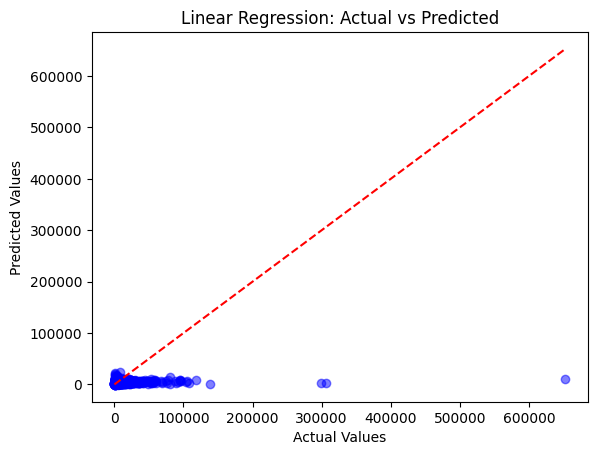

In [33]:
# Create a scatter plot of the actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

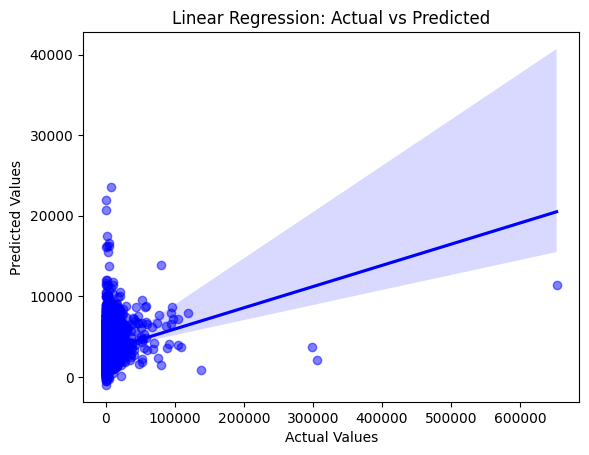

In [34]:
import seaborn as sns

# Create a scatter plot with regression line
sns.regplot(x=y_test, y=y_pred, color='blue', scatter_kws={'alpha': 0.5})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()